<a href="https://colab.research.google.com/github/VIVEKPATIL12/DS_Combined/blob/main/sub_classification_3_cate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import zipfile

In [9]:
zip_ref = zipfile.ZipFile('/content/RSCD_300_images_per_Category.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = [
    "water_asphalt_severe",
    "water_asphalt_slight",
    "water_asphalt_smooth",
    "water_concrete_severe",
    "water_concrete_slight",
    "water_concrete_smooth",
    "water_gravel",
    "water_mud",
    "wet_asphalt_severe",
    "wet_asphalt_slight",
    "wet_asphalt_smooth",
    "wet_concrete_severe",
    "wet_concrete_slight",
    "wet_concrete_smooth",
    "wet_gravel",
    "wet_mud",
    "dry_asphalt_severe",
    "dry_asphalt_slight",
    "dry_asphalt_smooth",
    "dry_concrete_severe",
    "dry_concrete_slight",
    "dry_concrete_smooth",
    "dry_gravel",
    "dry_mud",
    "fresh_snow",
    "ice",
    "melted_snow"
] # replace with your actual class names
data_dir = '/content/RSCD_300_images_per_Category'
train_dir = '/content/train/'
test_dir = '/content/test/'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))




In [4]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import scipy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')




Found 6480 images belonging to 27 classes.
Found 1620 images belonging to 27 classes.


In [5]:
# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(27, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, validation_data=test_generator, epochs=2)

# # Save the model
# model.save('model.h5')




In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


203/203 ━━━━━━━━━━━━━━━━━━━━ 71s 272ms/step - accuracy: 0.1536 - loss: 2.9436 - val_accuracy: 0.2531 - val_loss: 2.4831
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 34s 164ms/step - accuracy: 0.3525 - loss: 2.1929 - val_accuracy: 0.2963 - val_loss: 2.3281
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.4188 - loss: 1.9244 - val_accuracy: 0.3352 - val_loss: 2.1881
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 46s 192ms/step - accuracy: 0.4847 - loss: 1.7760 - val_accuracy: 0.3302 - val_loss: 2.1734
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 39s 182ms/step - accuracy: 0.5268 - loss: 1.5834 - val_accuracy: 0.3506 - val_loss: 2.1217
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.5790 - loss: 1.4848 - val_accuracy: 0.3827 - val_loss: 2.0891
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.6210 - loss: 1.3516 - val_accuracy: 0.3944 - val_loss: 2.0276
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 32s 156ms/step - accuracy: 0.6632 - loss: 1.2220 - val

Found 1620 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step


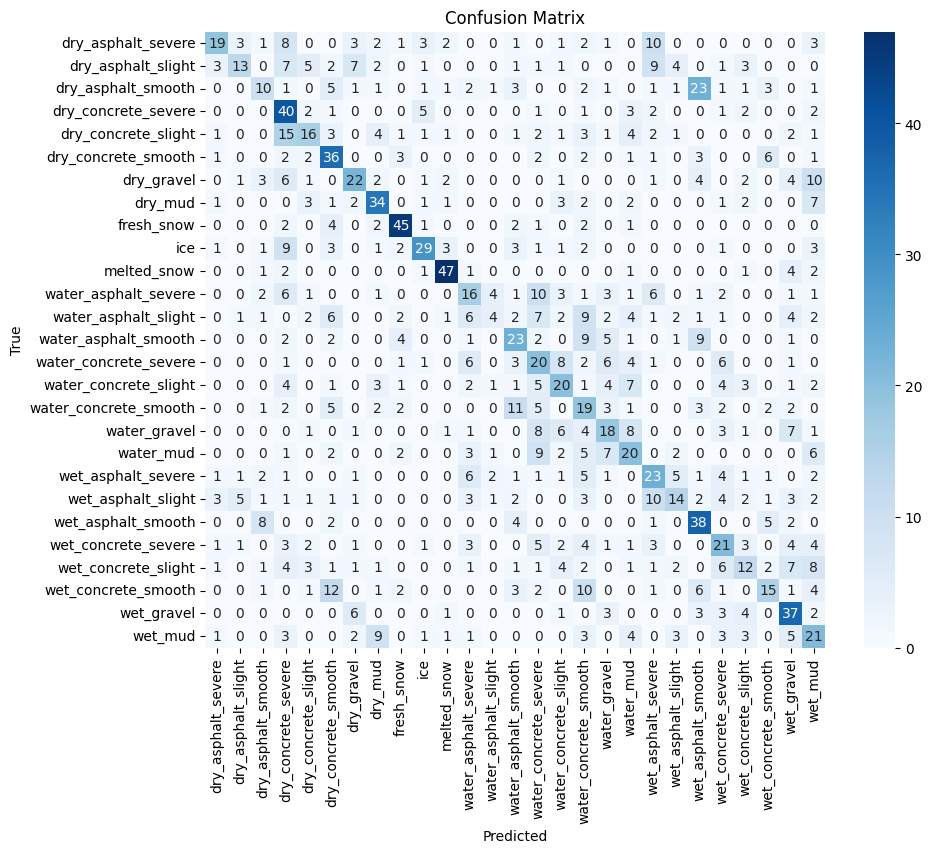

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.58      0.32      0.41        60
   dry_asphalt_slight       0.52      0.22      0.31        60
   dry_asphalt_smooth       0.30      0.17      0.22        60
  dry_concrete_severe       0.33      0.67      0.44        60
  dry_concrete_slight       0.40      0.27      0.32        60
  dry_concrete_smooth       0.41      0.60      0.49        60
           dry_gravel       0.46      0.37      0.41        60
              dry_mud       0.52      0.57      0.54        60
           fresh_snow       0.68      0.75      0.71        60
                  ice       0.62      0.48      0.54        60
          melted_snow       0.77      0.78      0.78        60
 water_asphalt_severe       0.31      0.27      0.29        60
 water_asphalt_slight       0.29      0.07      0.11        60
 water_asphalt_smooth       0.37      0.38      0.37        60
water_concrete_severe       0.24      0.33      0.28  

In [5]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 6480 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


203/203 ━━━━━━━━━━━━━━━━━━━━ 32s 155ms/step
